In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_7"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "src_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="pdf"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path


In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Deutsch Algorithm

In [3]:
#based on https://www.quantum-inspire.com/kbase/deutsch-jozsa-algorithm/
def uf0(qc):
    return qc

def uf1(qc):
    qc.x(1)
    return qc

def uf2(qc):
    qc.cx(0,1)
    return qc

def uf3(qc):
    qc.cx(0,1)
    qc.x(1)
    return qc

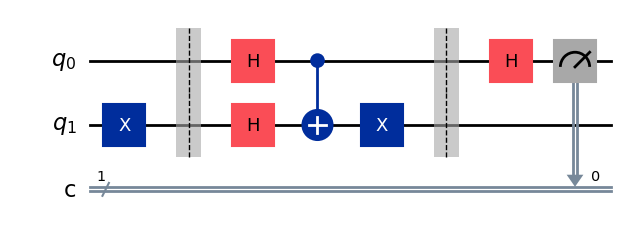

In [4]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr,cr)


qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
uf3(qc)
qc.barrier()
qc.h(0)
qc.measure(qr[0],cr)
qc.draw('mpl')



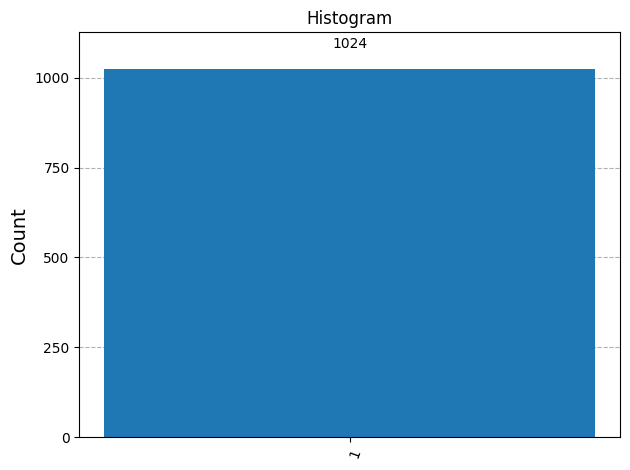

In [5]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)
results = simulator.run(qc).result()
counts = results.get_counts(qc)
plot_histogram(counts, title="Histogram")

# Deutsch-Jozsa Algorithm

In [6]:
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [7]:
# set the length of the first qregister
n = 3

In [8]:
def dj_oracle(case, n):
    # case is either constant or balanced and n is the size of the input register
    # Create a circuit that has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate



In [9]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit



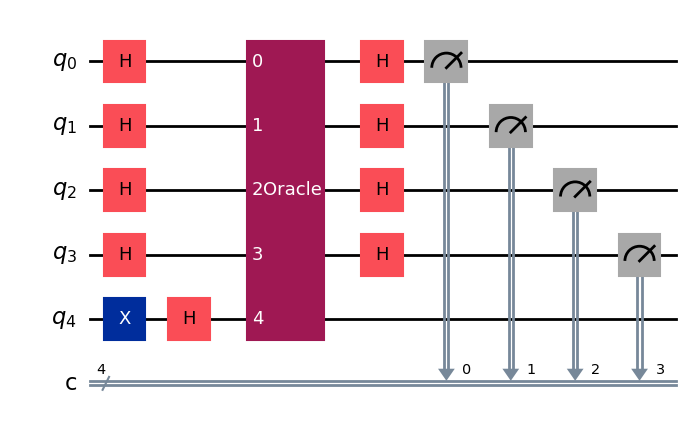

In [10]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw(output="mpl")

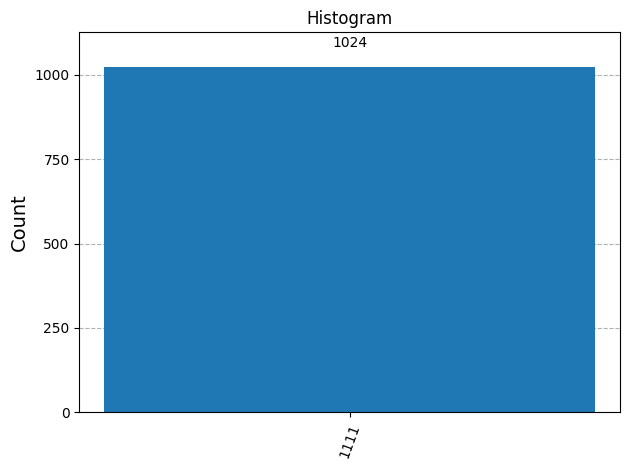

In [11]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(dj_circuit, simulator)
results = simulator.run(qc).result()
counts = results.get_counts(qc)
plot_histogram(counts, title="Histogram")